In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [36]:
df = pd.read_csv('data/air-passenger-arrivals-total-by-region-and-selected-country-of-embarkation/total-air-passenger-arrivals.csv')

In [37]:
df.head()

,month,level_1,value
0,1961-01,Number Of Air Passenger Arrivals,11814
1,1961-02,Number Of Air Passenger Arrivals,11027
2,1961-03,Number Of Air Passenger Arrivals,12703
3,1961-04,Number Of Air Passenger Arrivals,13159
4,1961-05,Number Of Air Passenger Arrivals,12221


In [38]:
df['year'] = df['month'].apply(lambda x: x.split('-')[0])
#df['year'] = df['year'].astype('int32')
df['month'] = df['month'].apply(lambda x: x.split('-')[1])
df = df.drop(['level_1'], axis=1)
df.head()

,month,value,year
0,01,11814,1961
1,02,11027,1961
2,03,12703,1961
3,04,13159,1961
4,05,12221,1961


In [39]:
yearly_df = df.where((df['year'].str.startswith('2')) & (~df['year'].str.contains('2017')))
#yearly_df['year'] = yearly_df['year'].astype('str')
yearly_df = yearly_df.groupby(by='year')['value'].sum()
yearly_df = yearly_df.apply(lambda x:x/10000)

In [40]:
yearly_df

year
2000    1354.5608
2001    1333.3167
2002    1372.7235
2003    1158.7576
2004    1433.6358
2005    1536.4071
2006    1667.7822
2007    1763.9557
2008    1818.5230
2009    1802.6026
2010    2048.6451
2011    2277.8149
2012    2505.5954
2013    2650.0359
2014    2666.8771
2015    2749.1096
2016    2920.3726
Name: value, dtype: float64

<IPython.core.display.Javascript object>


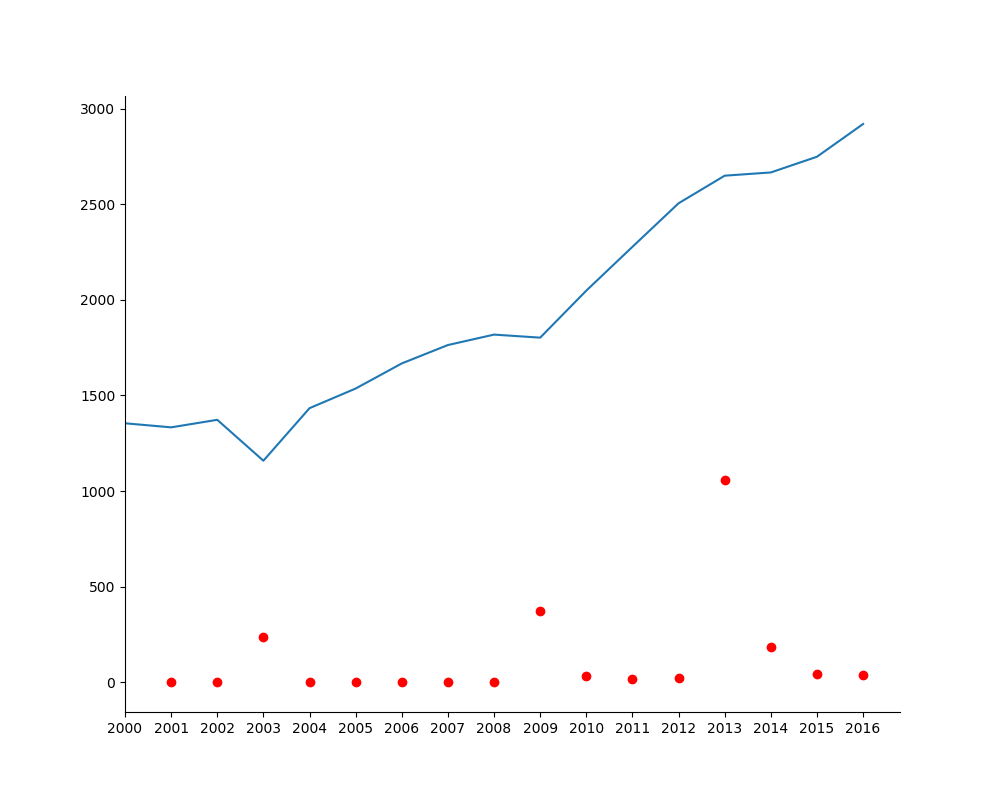

In [41]:
fig = plt.Figure(figsize=(30,30))
plt.gcf().set_size_inches(10,8)
plt.plot(yearly_df.index, yearly_df.values)
plt.xlim(xmin=0)
axes = plt.gca()
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
#plt.close()

In [11]:
disease_df = pd.read_csv('data/final-disease.csv')

disease_df['vector_based_diseases'] = disease_df['dengue'] + disease_df['malaria']
disease_df['air_respiratory_based_diseases'] = disease_df['avianflu'] + disease_df['sars'] + disease_df['chikunguniya']
disease_df


,year,dengue,malaria,avianflu,sars,chikunguniya,vector_based_diseases,air_respiratory_based_diseases
0,2001,663.0,266.0,0.0,0.0,0.0,929.0,0.0
1,2002,3938.0,175.0,0.0,0.0,0.0,4113.0,0.0
2,2003,4732.0,115.0,0.0,239.0,0.0,4847.0,239.0
3,2004,9302.0,153.0,0.0,0.0,0.0,9455.0,0.0
4,2005,13797.0,155.0,0.0,0.0,0.0,13952.0,0.0
5,2006,3058.0,189.0,0.0,0.0,0.0,3247.0,0.0
6,2007,8664.0,159.0,0.0,0.0,0.0,8823.0,0.0
7,2008,6768.0,159.0,0.0,0.0,0.0,6927.0,0.0
8,2009,4480.0,172.0,0.0,0.0,375.0,4652.0,375.0
9,2010,5358.0,190.0,0.0,0.0,34.0,5548.0,34.0


In [42]:
fig2 = plt.Figure(figsize=(30,30))
plt.gcf().set_size_inches(10,8)
#plt.gca().invert_yaxis()
#plt.yscale('log')
#plt.plot(disease_df['year'], disease_df['dengue'], color='blue')
#plt.plot(disease_df['year'], disease_df['vector_based_diseases'], color='purple', marker='o')
plt.scatter(disease_df['year'], disease_df['air_respiratory_based_diseases'], color='red', marker='o')
#plt.scatter(disease_df['year'], disease_df['sars'], color='red', marker='o')
#plt.scatter(disease_df['year'], disease_df['chikunguniya'], color='orange', marker='o')
#plt.xlim(xmin=2000)
axes = plt.gca()
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)